In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [39]:
def plotting(var_list,legend_list):
    i=0
    for var in var_list:
        i += 1
        x = range(len(var))
        plt.plot(x,var,linestyle="",marker="*",markersize=15,label=legend_list[i-1])
    plt.legend()    
    plt.show()
    return

In [3]:
fdir = "/home/afieguth/Documents/Batch1/"


In [4]:
run_no= np.load(fdir+"run_no.npy")
alpha_scale_in = np.load(fdir+"alpha_scale_in.npy")
lambda_val_in = np.load(fdir+"lambda_val_in.npy")
direction_in = np.load(fdir+"direction_in.npy")
phase_shift_in = np.load(fdir+"phase_shift_in.npy")


In [5]:
run_no_true = []
results_true = []
lambda_true = []
direction_true = []
phase_shift_true = []
for i in range(len(run_no)):
    run_no_true.append(run_no[i])
    results_true.append(alpha_scale_in[i])
    lambda_true.append(lambda_val_in[i])
    direction_true.append(direction_in[i])
    phase_shift_true.append(phase_shift_in[i])
    

In [6]:
# (l=5um, +) (l=5um, -) (l=10um, +) (l=10um, -) (l=25um, +) (l=25um, -)
# 95% CL
results_from_akio= np.loadtxt("Results_Noise_Batch1/AlphaForAlex.txt")

In [8]:
results_from_Nadavn = pd.read_csv("Results_Noise_Batch1/Batch1_negative_NP.csv", header=None).transpose()
results_from_Nadavp = pd.read_csv("Results_Noise_Batch1/Batch1_positive_NP.csv", header=None).transpose()
results_from_Nadavn.columns = ["nadav_alpha_l5_n","nadav_alpha_l10_n","nadav_alpha_l25_n"]
results_from_Nadavp.columns = ["nadav_alpha_l5_p","nadav_alpha_l10_p","nadav_alpha_l25_p"]
results_from_Nadav = pd.concat([results_from_Nadavn,results_from_Nadavp],axis=1)

In [9]:
results_from_Nadav

,nadav_alpha_l5_n,nadav_alpha_l10_n,nadav_alpha_l25_n,nadav_alpha_l5_p,nadav_alpha_l10_p,nadav_alpha_l25_p
0,-9.900000,-9.900000,-9.900000,5.289086,0.892284,0.372003
1,-99.000000,-9.900000,-9.900000,19.979695,3.368070,1.424573
2,-99.000000,-9.900000,-9.900000,62.543010,1000.000000,4.461346
3,-99.000000,-9.900000,-9.900000,14.507923,2.453790,1.034435
4,-9.900000,-9.900000,-9.900000,5.289086,0.892284,0.372003
...,...,...,...,...,...,...
95,-5.559823,-0.936854,-0.398563,1000.000000,1000.000000,1000.000000
96,-99.000000,-9.900000,-9.900000,54.547460,9.214265,3.900511
97,-9.900000,-9.900000,-9.900000,1000.000000,1.697129,0.718520
98,-9.900000,-9.900000,-9.900000,1000.000000,1.817652,0.761928


In [10]:
run_no_a = []
l5p = []
l5m = []
l10p = []
l10m = []
l25p = []
l25m = []

for results in results_from_akio:
    a,b,c,d,e,f,g = results
    run_no_a.append(a)
    l5p.append(b/1e8)
    l5m.append(c/1e8)
    l10p.append(d/1e8)
    l10m.append(e/1e8)
    l25p.append(f/1e8)
    l25m.append(g/1e8)


In [11]:
df_raw=pd.DataFrame()

In [12]:
df_raw["run_no_true"]=run_no_true
df_raw["alpha"]=results_true
df_raw["lambda"]=lambda_true
df_raw["direction"]=direction_true
df_raw["phase_val"]=phase_shift_true



In [13]:
df = df_raw.sort_values(by=['run_no_true']).reset_index()

In [14]:
df["akio_alpha_l5_p"]=l5p
df["akio_alpha_l10_p"]=l10p
df["akio_alpha_l25_p"]=l25p
df["akio_alpha_l5_n"]=l5m
df["akio_alpha_l10_n"]=l10m
df["akio_alpha_l25_n"]=l25m


In [15]:
df = pd.concat([df,results_from_Nadav],axis=1)

In [16]:
df

,index,run_no_true,alpha,lambda,direction,phase_val,akio_alpha_l5_p,akio_alpha_l10_p,akio_alpha_l25_p,akio_alpha_l5_n,akio_alpha_l10_n,akio_alpha_l25_n,nadav_alpha_l5_n,nadav_alpha_l10_n,nadav_alpha_l25_n,nadav_alpha_l5_p,nadav_alpha_l10_p,nadav_alpha_l25_p
0,40,0,32000000.0,18,pull,TF,4.0,0.7,0.4,-1.8,-0.4,-0.2,-9.900000,-9.900000,-9.900000,5.289086,0.892284,0.372003
1,88,1,242000000.0,12,pull,Flip,4.9,0.9,0.5,-1.8,-0.4,-0.2,-99.000000,-9.900000,-9.900000,19.979695,3.368070,1.424573
2,12,2,544000000.0,18,pull,TF,62.4,11.0,5.4,-1.7,-0.3,-0.2,-99.000000,-9.900000,-9.900000,62.543010,1000.000000,4.461346
3,4,3,113000000.0,18,pull,TF,13.1,2.3,1.2,-1.7,-0.3,-0.2,-99.000000,-9.900000,-9.900000,14.507923,2.453790,1.034435
4,36,4,32000000.0,18,pull,TF,4.0,0.7,0.4,-1.8,-0.4,-0.2,-9.900000,-9.900000,-9.900000,5.289086,0.892284,0.372003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,83,95,100000000.0,12,pull,Random,2.1,0.4,0.2,-2.8,-0.5,-0.3,-5.559823,-0.936854,-0.398563,1000.000000,1000.000000,1000.000000
96,14,96,471000000.0,18,pull,TF,54.3,9.5,4.7,-1.7,-0.3,-0.2,-99.000000,-9.900000,-9.900000,54.547460,9.214265,3.900511
97,76,97,100000000.0,12,pull,Random_TF,8.8,1.6,0.8,-1.7,-0.3,-0.2,-9.900000,-9.900000,-9.900000,1000.000000,1.697129,0.718520
98,28,98,78000000.0,18,pull,TF,9.2,1.7,0.8,-1.7,-0.4,-0.2,-9.900000,-9.900000,-9.900000,1000.000000,1.817652,0.761928


In [17]:
t0 = df.alpha[(df["lambda"]==20) & (df["direction"]=="pull") & (df['phase_val']=="TF") ]/1e8
print(t0)
print(len(t0))

40    0.0
Name: alpha, dtype: float64
1


In [18]:
a0a = df.akio_alpha_l10_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
a0b = df.akio_alpha_l25_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]

n0a = df.nadav_alpha_l10_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
n0b = df.nadav_alpha_l25_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]

print(a0a,a0b)
print(len(a0a),len(a0b))
print(n0a,n0b)
print(len(n0a),len(n0b))

40    0.5
Name: akio_alpha_l10_p, dtype: float64 40    0.3
Name: akio_alpha_l25_p, dtype: float64
1 1
40    0.357405
Name: nadav_alpha_l10_p, dtype: float64 40    0.144943
Name: nadav_alpha_l25_p, dtype: float64
1 1


In [19]:
t1 = df.alpha[(df["lambda"]==5) & (df["direction"]=="pull") & (df['phase_val']=="TF") ]/1e8
print(t1)
print(len(t1))

5     0.052
10    2.030
21    0.610
32    7.870
41    0.210
51    0.010
52    0.015
71    0.280
92    6.710
Name: alpha, dtype: float64
9


In [25]:
a1 = df.akio_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
n1 = df.nadav_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]

print(a1,n1)
print(len(a1),len(n1))

5     2.4
10    2.4
21    2.4
32    9.5
41    2.4
51    2.4
52    2.4
71    2.4
92    7.7
Name: akio_alpha_l5_p, dtype: float64 5     1000.000000
10       2.972671
21    1000.000000
32    1000.000000
41    1000.000000
51    1000.000000
52    1000.000000
71    1000.000000
92       9.366128
Name: nadav_alpha_l5_p, dtype: float64
9 9


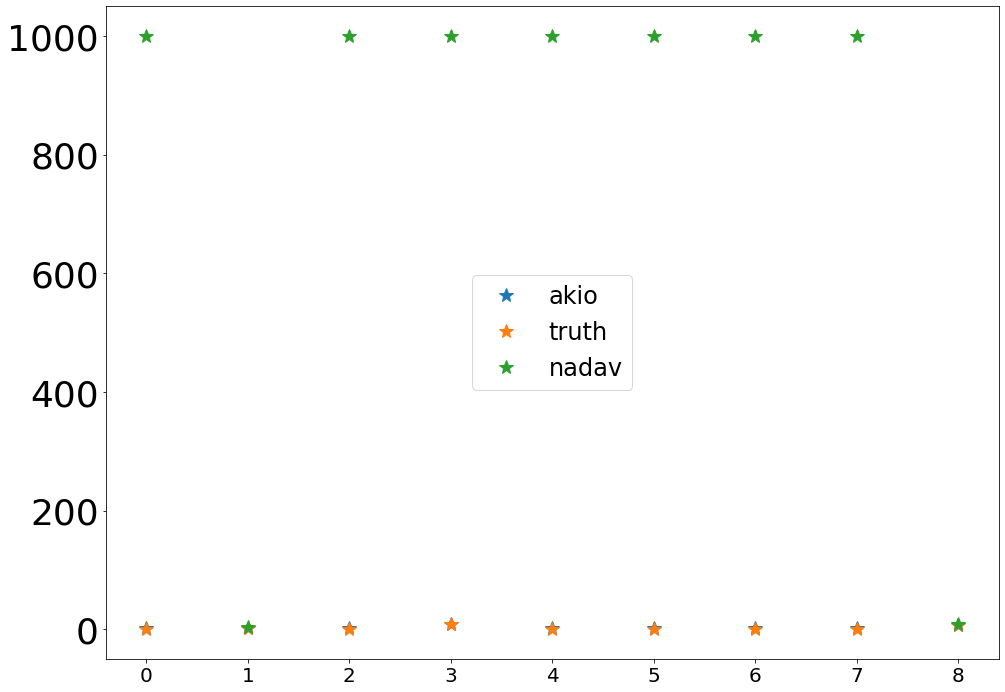

In [29]:
plotting([a1,t1,n1],["akio","truth","nadav"])

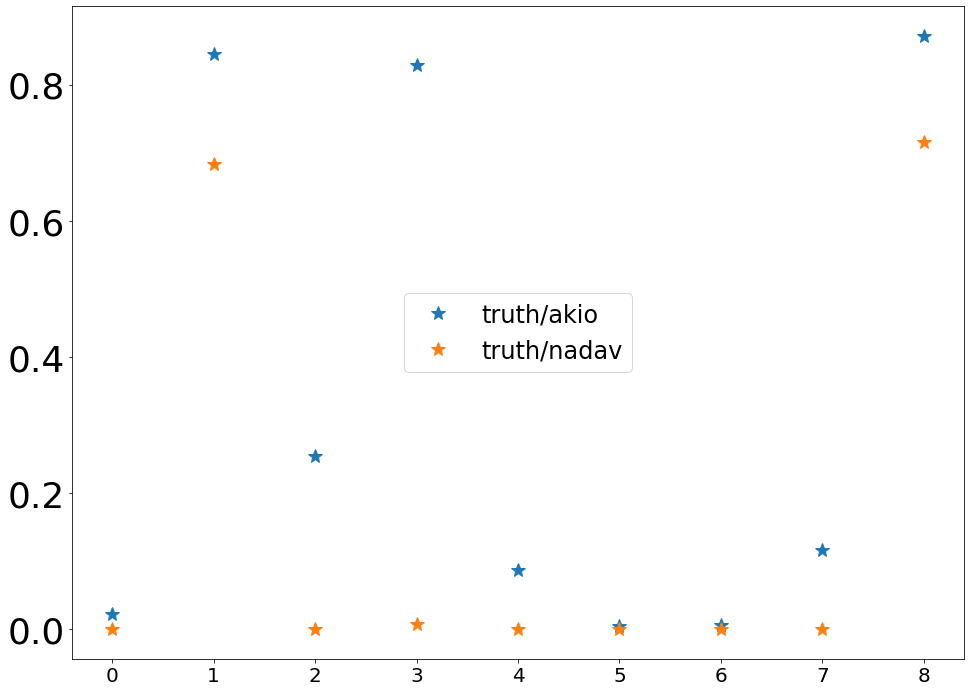

In [30]:
plotting([np.divide(t1,a1),np.divide(t1,n1)],["truth/akio","truth/nadav"])

In [31]:
t2=df.alpha[(df["lambda"]==10)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t2)
print(len(t2))


6     0.230
16    0.020
28    5.610
33    0.670
35    0.650
46    0.029
56    0.730
59    7.900
63    6.500
65    0.190
68    0.044
75    2.620
82    4.190
86    0.043
90    0.065
Name: alpha, dtype: float64
15


In [32]:
a2 = df.akio_alpha_l10_p[(df["lambda"]==10) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n2 = df.nadav_alpha_l10_p[(df["lambda"]==10) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

print(a2,n2)
print(len(a2),len(n2))

6     0.4
16    0.5
28    6.3
33    0.9
35    0.9
46    0.5
56    0.8
59    8.9
63    7.3
65    0.5
68    0.5
75    3.0
82    4.7
86    0.5
90    0.5
Name: akio_alpha_l10_p, dtype: float64 6     0.431696
16    0.357392
28    6.220317
33    1.035058
35    1.053577
46    0.357392
56    1.207504
59    8.565258
63    7.114775
65    0.357392
68    0.357392
75    3.110869
82    4.733532
86    0.357392
90    0.357392
Name: nadav_alpha_l10_p, dtype: float64
15 15


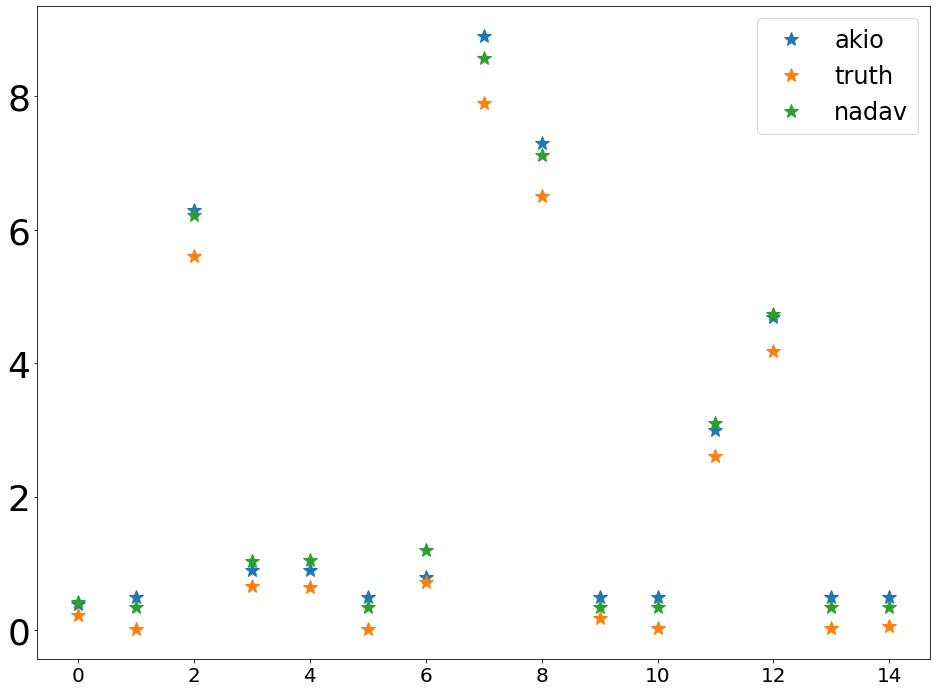

In [33]:
plotting([a2,t2,n2],["akio","truth","nadav"])

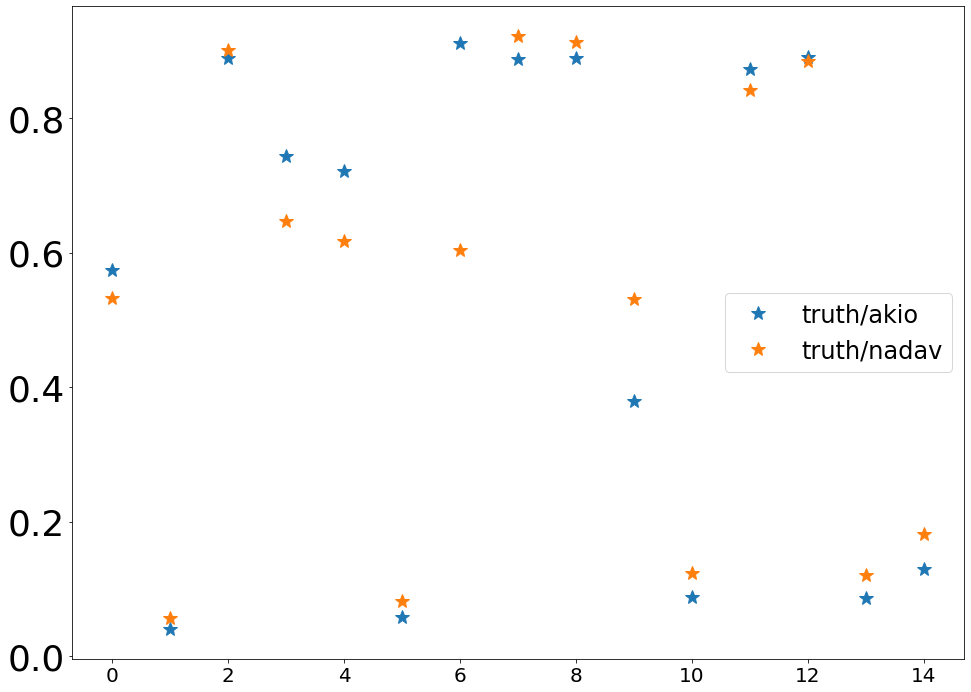

In [34]:
plotting([np.divide(t2,a2),np.divide(t2,n2)],["truth/akio","truth/nadav"])

In [35]:
t3=df.alpha[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t3)
print(len(t3))

0     0.320
2     5.440
3     1.130
4     0.320
8     0.047
11    6.320
12    0.034
14    0.290
15    0.500
18    4.280
19    0.270
23    4.430
24    0.390
27    0.450
29    0.070
30    0.260
34    0.019
36    2.510
38    2.890
42    0.056
43    7.790
44    0.062
47    0.350
48    0.620
49    5.660
54    0.200
55    7.970
57    4.610
58    0.018
64    7.510
66    0.010
72    0.050
77    0.032
79    7.240
80    0.280
81    0.740
83    0.043
85    0.570
87    6.790
88    0.025
91    0.037
94    0.071
96    4.710
98    0.780
99    0.031
Name: alpha, dtype: float64
45


In [36]:
a3a=df.akio_alpha_l10_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
a3b=df.akio_alpha_l25_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

n3a=df.nadav_alpha_l10_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n3b=df.nadav_alpha_l25_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

print(a3a,a3b,n3a,n3b)
print(len(a3a),len(a3b),len(n3a),len(n3b))

0      0.7
2     11.0
3      2.3
4      0.7
8      0.5
11    12.8
12     0.5
14     0.9
15     1.0
18     8.5
19     0.9
23     9.0
24     0.9
27     1.1
29     0.5
30     0.6
34     0.5
36     5.0
38     5.9
42     0.5
43    15.8
44     0.5
47     0.7
48     1.3
49    11.5
54     0.9
55    16.1
57     9.3
58     0.5
64    15.3
66     0.5
72     0.5
77     0.5
79    14.7
80     0.9
81     1.7
83     0.5
85     1.3
87    13.7
88     0.5
91     0.5
94     0.5
96     9.5
98     1.7
99     0.5
Name: akio_alpha_l10_p, dtype: float64 0     0.4
2     5.4
3     1.2
4     0.4
8     0.3
11    6.3
12    0.3
14    0.5
15    0.5
18    4.2
19    0.5
23    4.4
24    0.5
27    0.6
29    0.3
30    0.3
34    0.3
36    2.5
38    4.0
42    0.3
43    7.8
44    0.3
47    0.4
48    0.7
49    5.7
54    0.5
55    7.9
57    4.6
58    0.3
64    7.5
66    0.3
72    0.3
77    0.3
79    7.3
80    0.5
81    0.8
83    0.3
85    0.6
87    6.7
88    0.3
91    0.3
94    0.3
96    4.7
98    0.8
99    0.3
Name: akio_alpha

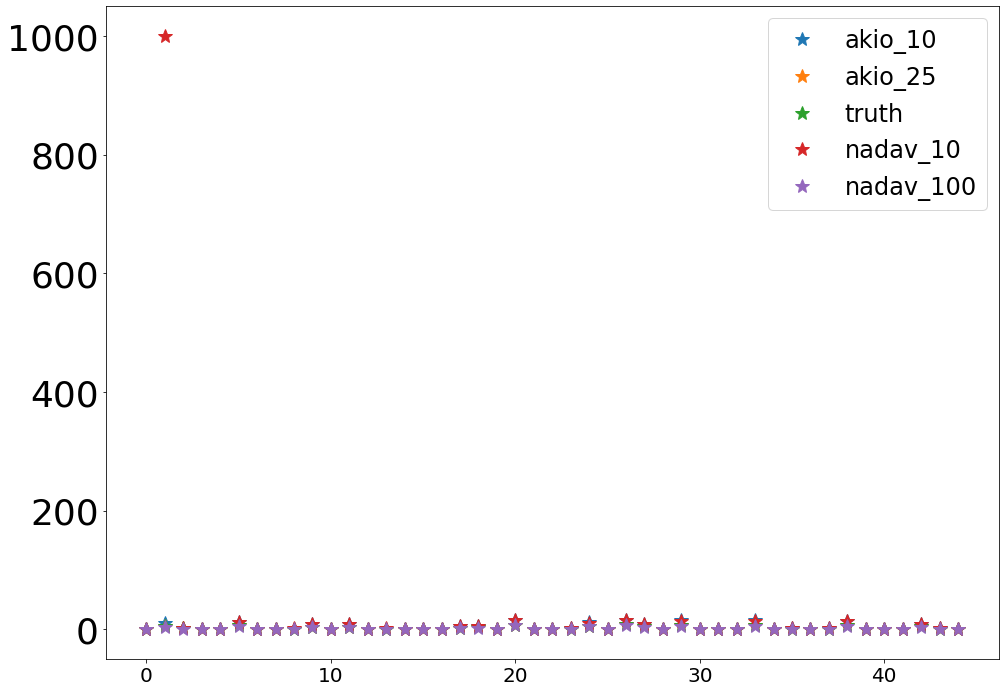

In [37]:
plotting([a3a,a3b,t3,n3a,n3b],["akio_10","akio_25","truth","nadav_10","nadav_100"])


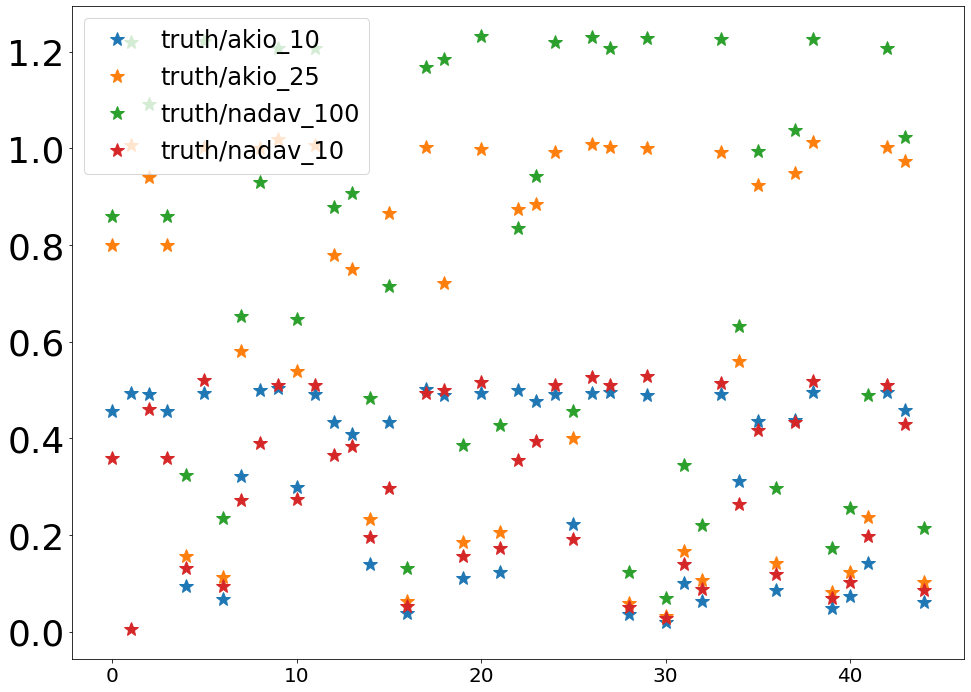

In [41]:
plotting([np.divide(t3,a3a),np.divide(t3,a3b),np.divide(t3,n3b),np.divide(t3,n3a)],["truth/akio_10","truth/akio_25","truth/nadav_100","truth/nadav_10"])


In [42]:
t4=df.alpha[(df["lambda"]==31)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t4)
print(len(t4))

22    0.080
39    0.033
61    1.360
67    0.700
70    5.680
78    0.031
Name: alpha, dtype: float64
6


In [44]:
a4 = df.akio_alpha_l25_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n4 = df.nadav_alpha_l25_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

print(a4,n4)
print(len(a4),len(n4))

22    0.3
39    0.3
61    1.6
67    0.9
70    6.7
78    0.3
Name: akio_alpha_l25_p, dtype: float64 22    0.144958
39    0.144938
61    1.412595
67    0.808048
70    5.504065
78    0.144938
Name: nadav_alpha_l25_p, dtype: float64
6 6


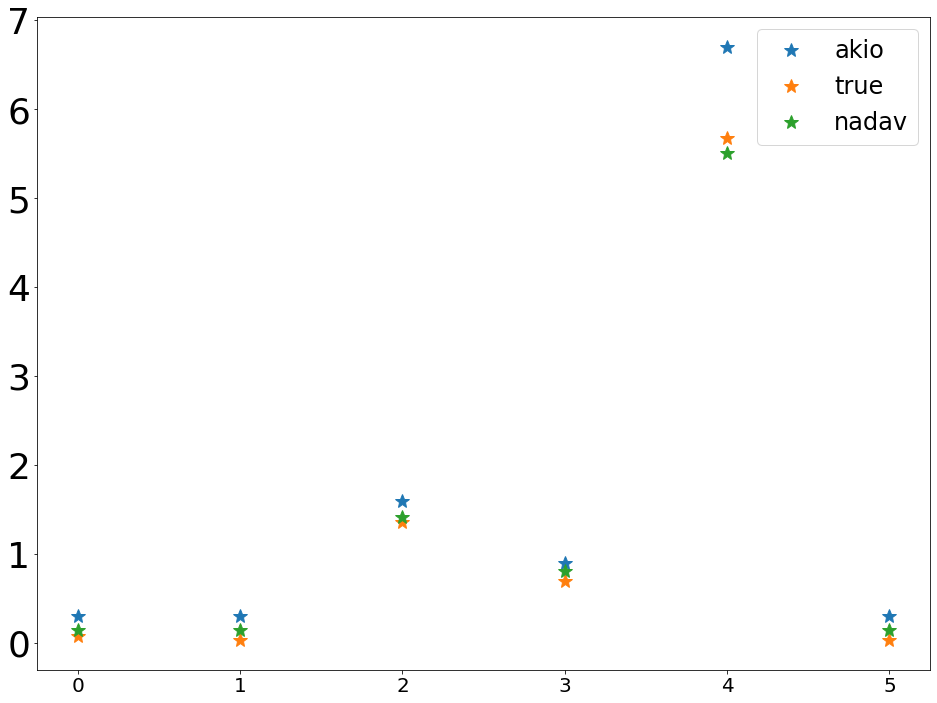

In [46]:
plotting([a4,t4,n4],["akio","true","nadav"])

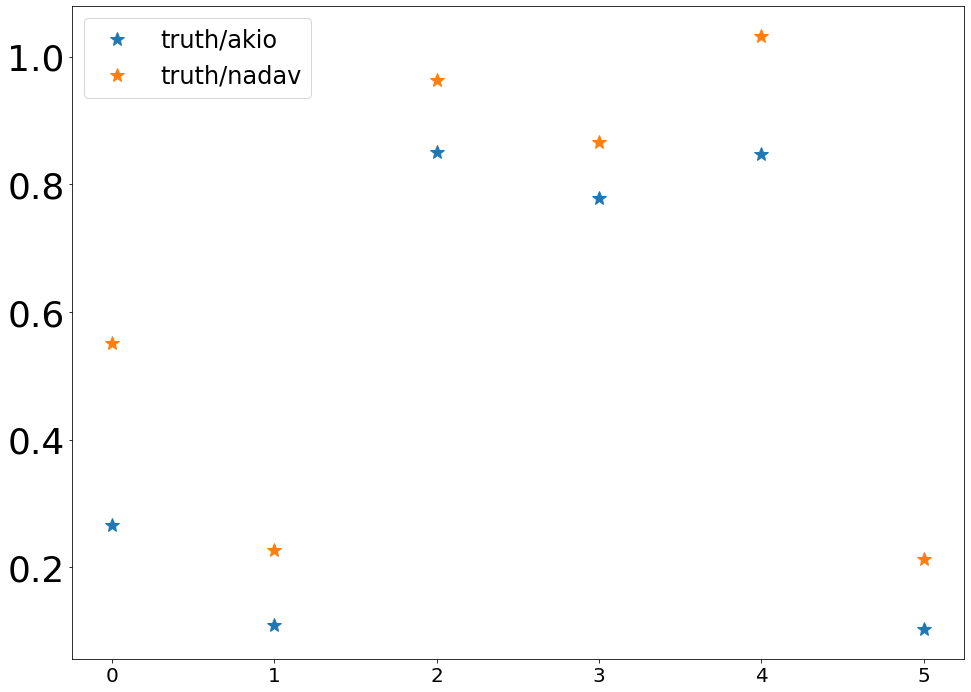

In [47]:
plotting([np.divide(t4,a4),np.divide(t4,n4)],["truth/akio","truth/nadav"])

In [50]:
t5 = df.alpha[(df["lambda"]==12) & (df["direction"]=="push")& (df['phase_val']=="TF") ]/1e8
print(t5)
print(len(t5))

7     2.10
17    3.54
25    6.22
26    7.12
50    5.13
73    2.28
76    3.03
84    7.27
Name: alpha, dtype: float64
8


In [51]:
a5a=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]
a5b=-df.akio_alpha_l25_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]

n5a=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]
n5b=-df.nadav_alpha_l25_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]


print(a5a,a5b,n5a,n5b)
print(len(a5a),len(a5b))

7      2.5
17     4.7
25     8.6
26    10.1
50     7.3
73     2.8
76     3.6
84    10.5
Name: akio_alpha_l10_n, dtype: float64 7     1.2
17    2.3
25    4.2
26    5.0
50    3.6
73    1.4
76    1.8
84    5.2
Name: akio_alpha_l25_n, dtype: float64 7      3.334909
17     5.341519
25     9.070140
26    10.140195
50     7.550334
73     3.599399
76     4.592941
84    10.236210
Name: nadav_alpha_l10_n, dtype: float64 7     1.413343
17    2.251684
25    3.832984
26    4.357622
50    3.194415
73    1.522899
76    1.937557
84    4.458201
Name: nadav_alpha_l25_n, dtype: float64
8 8


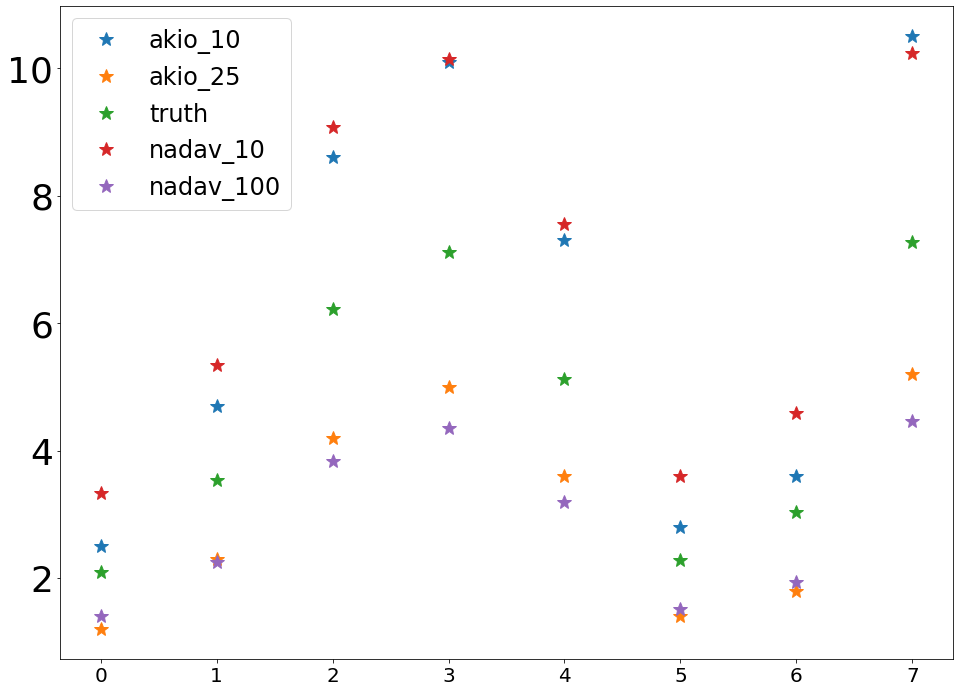

In [53]:
plotting([a5a,a5b,t5,n5a,n5b],["akio_10","akio_25","truth","nadav_10","nadav_100"])

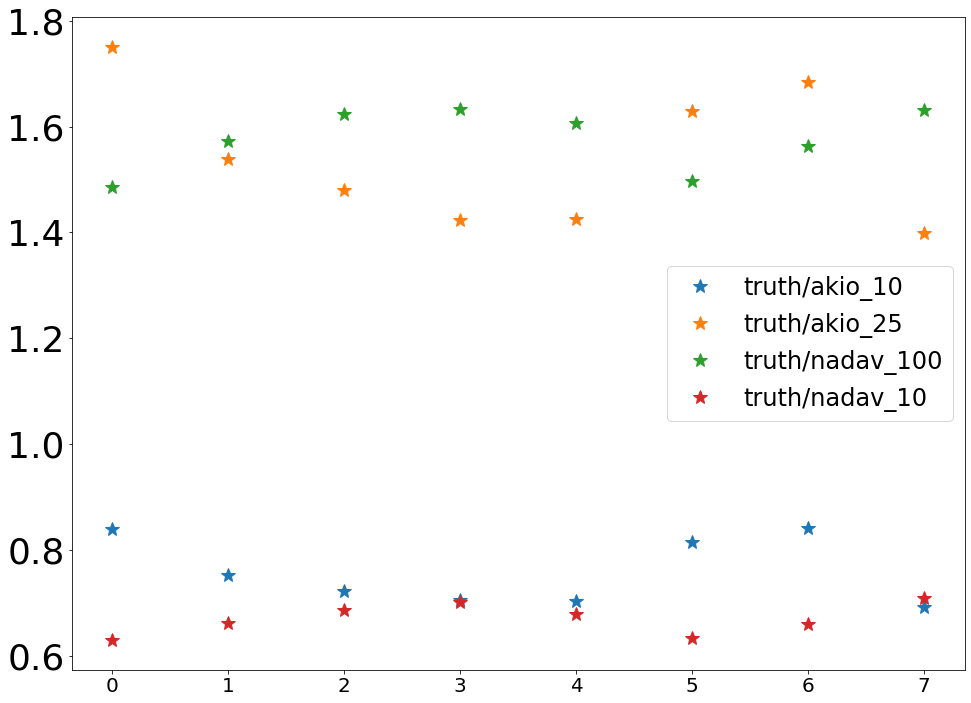

In [55]:
plotting([np.divide(t5,a5a),np.divide(t5,a5b),np.divide(t5,n5b),np.divide(t5,n5a)],["truth/akio_10","truth/akio_25","truth/nadav_100","truth/nadav_10"])

In [56]:
t6 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Flip") ]/1e8
print(t6)
print(len(t6))

1     2.42
9     6.83
20    3.90
37    1.02
60    4.20
62    7.90
74    5.80
89    7.62
Name: alpha, dtype: float64
8


In [61]:
a6a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
a6b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]

n6a=df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
n6b=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]


print(a6a,a6b,n6a,n6b)
print(len(a6a),len(a6b))

1     0.9
9     0.9
20    0.9
37    0.9
60    0.9
62    0.9
74    0.9
89    0.9
Name: akio_alpha_l10_p, dtype: float64 1     0.4
9     0.4
20    0.4
37    0.4
60    0.4
62    0.4
74    0.4
89    0.4
Name: akio_alpha_l10_n, dtype: float64 1        3.368070
9        8.947194
20       5.217916
37       1.566686
60       5.583520
62    1000.000000
74       7.605948
89    1000.000000
Name: nadav_alpha_l10_p, dtype: float64 1     9.9
9     9.9
20    9.9
37    9.9
60    9.9
62    9.9
74    9.9
89    9.9
Name: nadav_alpha_l10_n, dtype: float64
8 8


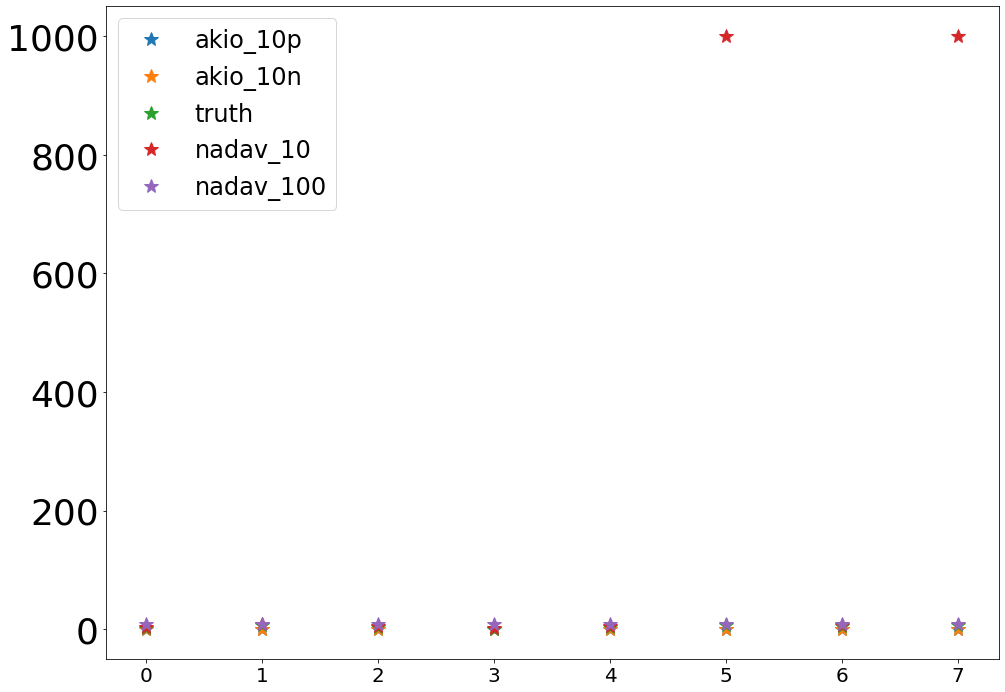

In [62]:
plotting([a6a,a6b,t6,n6a,n6b],["akio_10p","akio_10n","truth","nadav_10","nadav_100"])

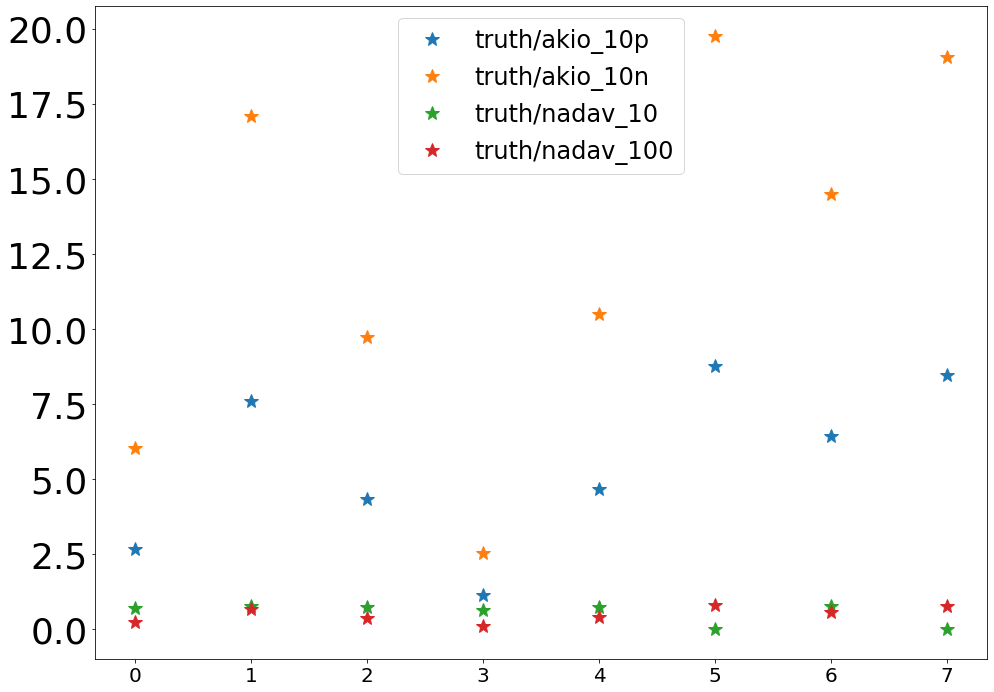

In [64]:
plotting([np.divide(t6,a6a),np.divide(t6,a6b),np.divide(t6,n6a),np.divide(t6,n6b)],["truth/akio_10p","truth/akio_10n","truth/nadav_10","truth/nadav_100"])

In [65]:
t7 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Random") ]
print(t7)
print(len(t7))

31    100000000.0
69    100000000.0
93    100000000.0
95    100000000.0
Name: alpha, dtype: float64
4


In [66]:
a7a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]
a7b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]

n7a=df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]
n7b=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]


print(a7a,a7b,n7a,n7b)
print(len(a7a),len(a7b))

31    0.5
69    0.5
93    0.4
95    0.4
Name: akio_alpha_l10_p, dtype: float64 31    0.4
69    0.4
93    0.4
95    0.5
Name: akio_alpha_l10_n, dtype: float64 31       0.442123
69    1000.000000
93       0.560007
95    1000.000000
Name: nadav_alpha_l10_p, dtype: float64 31    9.900000
69    0.708634
93    9.900000
95    0.936854
Name: nadav_alpha_l10_n, dtype: float64
4 4


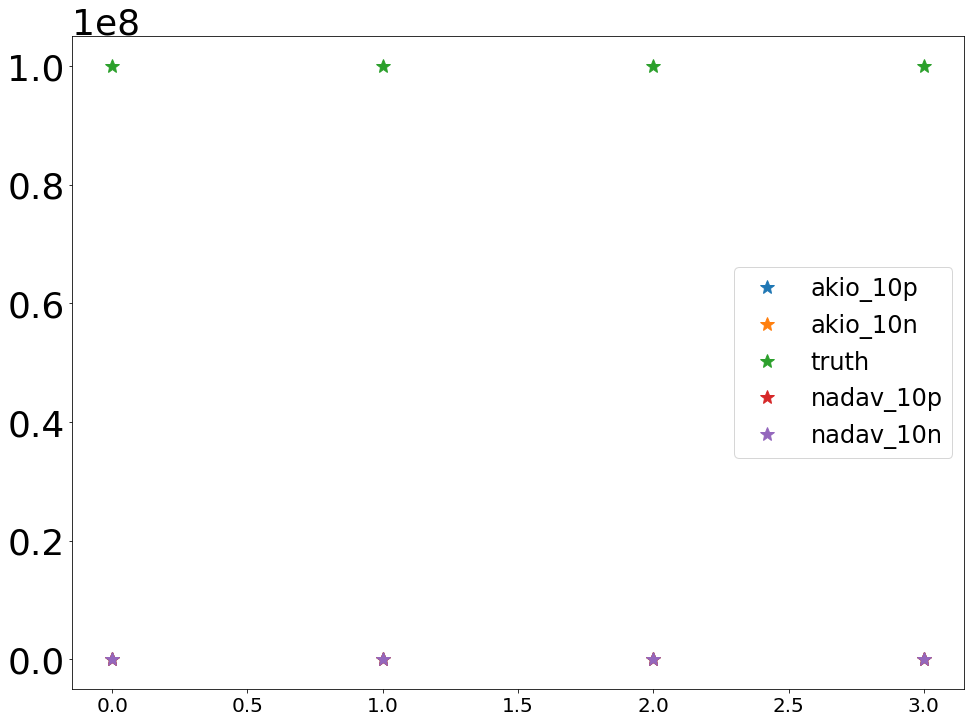

In [69]:
plotting([a7a,a7b,t7,n7a,n7b],["akio_10p","akio_10n","truth","nadav_10p","nadav_10n"])

In [70]:
t8 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Random_TF") ]/1e8
print(t8)
print(len(t8))

13    1.0
45    1.0
53    1.0
97    1.0
Name: alpha, dtype: float64
4


In [73]:
a8a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]
a8b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]

n8a = df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]
n8b= -df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]

print(a8a,a8b,n8a,n8b)
print(len(a8a),len(a8b))

13    1.6
45    1.6
53    1.6
97    1.6
Name: akio_alpha_l10_p, dtype: float64 13    0.3
45    0.3
53    0.3
97    0.3
Name: akio_alpha_l10_n, dtype: float64 13    1.699530
45    1.697243
53    1.698685
97    1.697129
Name: nadav_alpha_l10_p, dtype: float64 13    9.9
45    9.9
53    9.9
97    9.9
Name: nadav_alpha_l10_n, dtype: float64
4 4


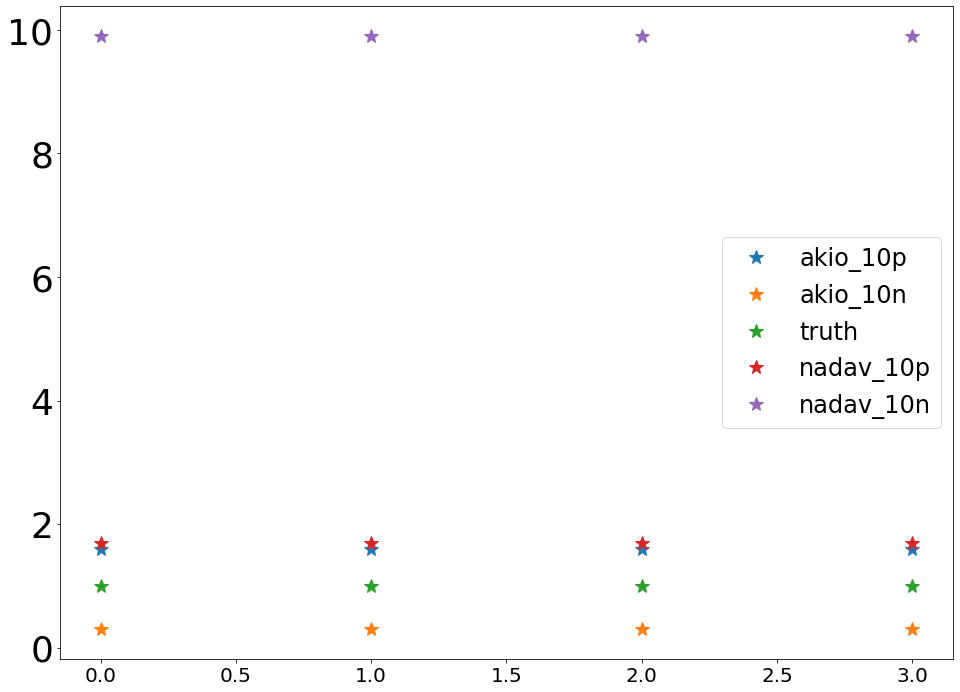

In [76]:
plotting([a8a,a8b,t8,n8a,n8b],["akio_10p","akio_10n","truth","nadav_10p","nadav_10n"])